In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
r2=r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve, auc
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

import warnings
warnings.filterwarnings('ignore')


In [87]:
df = pd.read_csv('avocado.csv')

In [88]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


unnamed:0 column is irrelevant so we will delete that

In [89]:
df = df.drop(columns=['Unnamed: 0'])

In [90]:
df.rename(columns = {'4046':'small', '4225':'large','4770':'xlarge'}, inplace=True)

In [91]:
df.head()

,Date,AveragePrice,Total Volume,small,large,xlarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [92]:
df.shape

(18249, 13)

In [93]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [94]:
len(df['region'].unique())

54

In [95]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [96]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

We have 2 types of Avacado available, Organic and conventional in the year from 2015 to 2018 for 54 different regions 

In [97]:
df['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [98]:
df.isnull().sum().sum()

0

In [99]:
df.duplicated().sum()

0

In [100]:
#checking any blank spaces
df.eq(' ').sum().sum()

0

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   small         18249 non-null  float64
 4   large         18249 non-null  float64
 5   xlarge        18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [102]:
df.describe()

,AveragePrice,Total Volume,small,large,xlarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We will analysis some features with each other

Price vs type of avacado

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

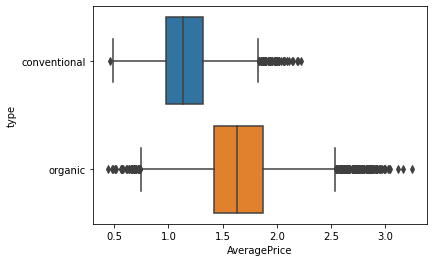

In [103]:
sns.boxplot(x='AveragePrice',y='type', data=df)

From the above graph, we can see that, price of organic avacado is higher than conventional. 

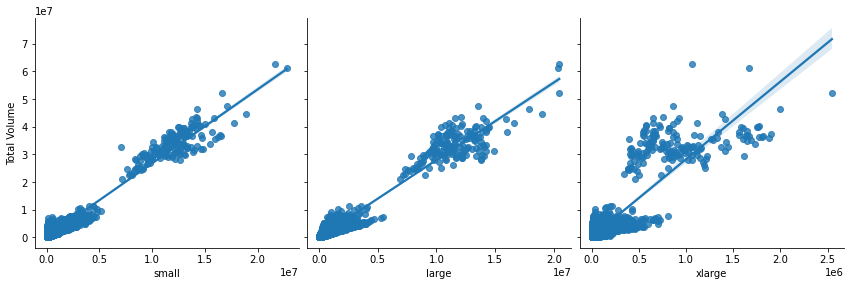

In [104]:
sns.pairplot(x_vars=['small','large','xlarge'], y_vars=['Total Volume'], data=df, kind='reg', size=4)

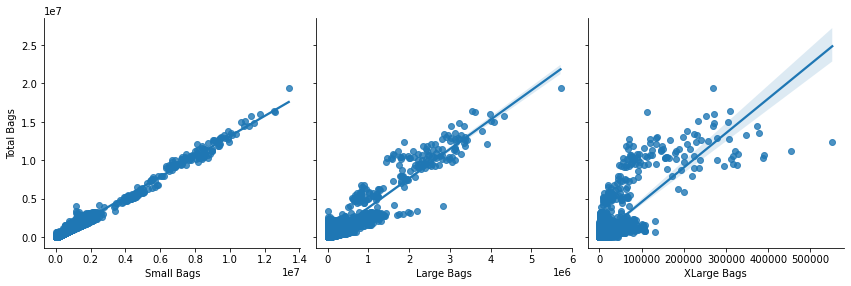

In [105]:
sns.pairplot(x_vars=['Small Bags','Large Bags','XLarge Bags'], y_vars=['Total Bags'], data=df, kind='reg', size=4)

From the above graph we can conclude that Total volume and small volume has very strong co-relation, Likewise Total bags and small bags also has goof co-relation. 
Total bags vs xlarge bags & total volume vs large volume has very weak co-relation

in the model creation, We can use small volume and small bags instead of Total volume and total bags respectively

# Encoding

In [106]:
for col in df.columns:
    if df[col].dtype == object:
        print(col)

Date
type
region


In [107]:
le = LabelEncoder()

In [108]:
date_encoding = le.fit_transform(df['Date'])
date_encoding 

array([ 51,  50,  49, ..., 159, 158, 157])

In [109]:
type_encoding = le.fit_transform(df['type'])
type_encoding 

array([0, 0, 0, ..., 1, 1, 1])

In [110]:
region_encoding = le.fit_transform(df['region'])
region_encoding 

array([ 0,  0,  0, ..., 53, 53, 53])

In [111]:
df['Date'] = date_encoding
df['type'] = type_encoding
df['region'] = region_encoding

In [112]:
df.head()

,Date,AveragePrice,Total Volume,small,large,xlarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [113]:
df.shape

(18249, 13)

In [114]:
df.corr()['type'].sort_values(ascending = True)

Total Volume   -0.232434
large          -0.232289
small          -0.225819
Small Bags     -0.220535
Total Bags     -0.217788
xlarge         -0.210027
Large Bags     -0.193177
XLarge Bags    -0.175483
region         -0.000280
Date           -0.000060
year           -0.000032
AveragePrice    0.615845
type            1.000000
Name: type, dtype: float64

As we can see Date and year has no relation with type of avacado we will not consider that column 

# Classification Model - Type of Avacado

First we will create the model to classify the type of avacado

In [115]:
x = df[['AveragePrice','small','large','xlarge','Small Bags','Large Bags','XLarge Bags']]
y = df['type']

print('features shape',x.shape,'\n' 'Label Shape',y.shape)

features shape (18249, 7) 
Label Shape (18249,)


In [116]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

Model Selection

Logistics Regression

In [117]:
lr = LogisticRegression()
lr_score = cross_val_score(lr, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
lr_score.mean()

-0.08368382428674424

Random Forest Classifier

In [118]:
rf = RandomForestClassifier()
rf_score = cross_val_score(rf, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
rf_score.mean()

-0.008376463418821025

Support Vector Classifier

In [119]:
svc=SVC()
svc_score = cross_val_score(svc, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
svc_score.mean()

-0.10427451333813988

K Neighbors Classifier

In [120]:
knn = KNeighborsClassifier()
knn_score = cross_val_score(knn, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
knn_score.mean()

-0.024424202629862325

Decision Tree Classifier

In [121]:
dt = DecisionTreeClassifier()
dt_score = cross_val_score(dt, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
dt_score.mean()

-0.017222594156624436

We observed minimum negative mean squared error for Random Forest Classifier, Will hypertune this model

In [122]:
gcv = GridSearchCV

In [123]:
params = {
    'max_features': ['auto','sqrt','log2'],
         'max_depth':[4,5,6,7,8],
         'criterion':['gini','entropy'],
         "n_estimators":[10,50,120,350]
         }

In [124]:
hypt = gcv(rf, params, cv=7, scoring='accuracy')

hypt.fit(x_train,y_train)

hypt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 120}

# Random Forest Classifier

In [125]:
rf = RandomForestClassifier(n_estimators=50, max_depth=8, max_features= 'sqrt', criterion='entropy')

In [126]:
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70, random_state=i)
    rf.fit(x_train,y_train)
    y_pred_test = rf.predict(x_test)
    y_pred_train = rf.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print('Max Accuracy', maxAcc, 'Max Random State', maxRS)

Max Accuracy 0.9897716894977169 Max Random State 18


# Score Report of the Model

In [127]:
#Testing Report
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2749
           1       0.99      0.98      0.99      2726

    accuracy                           0.99      5475
   macro avg       0.99      0.99      0.99      5475
weighted avg       0.99      0.99      0.99      5475



In [128]:
#Training Report
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6377
           1       1.00      0.98      0.99      6397

    accuracy                           0.99     12774
   macro avg       0.99      0.99      0.99     12774
weighted avg       0.99      0.99      0.99     12774



# Confusion Matrix

<AxesSubplot:>

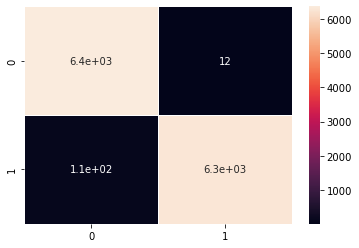

In [129]:
#train
cmtrain = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cmtrain, annot = True, linewidth=0.5)

<AxesSubplot:>

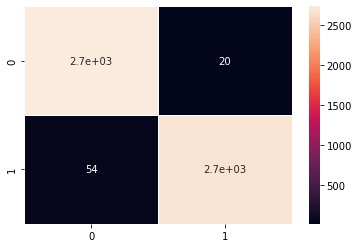

In [130]:
#test
cmtest = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cmtest, annot = True, linewidth=0.5)

# AUC ROC curve

<function matplotlib.pyplot.show(close=None, block=None)>

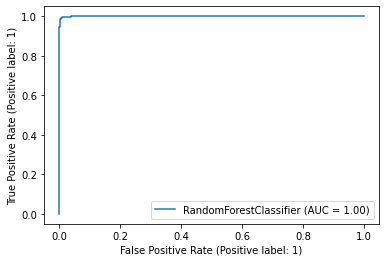

In [131]:
#Training Curves and values

plot_roc_curve(rf,x_train,y_train)
plt.legend(prop={'size':10}, loc='lower right')

plt.show

In [132]:
hypt.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=120)

<function matplotlib.pyplot.show(close=None, block=None)>

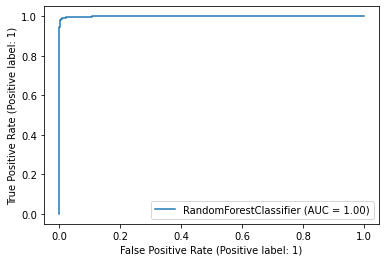

In [133]:
#Testing Curves and values

plot_roc_curve(hypt.best_estimator_,x_test,y_test)
plt.legend(prop={'size':10}, loc='lower right')

plt.show

Saving the Classification Model

In [134]:
import pickle

In [135]:
pickle.dump('rf', open('Randomforest_model', 'wb'))

# Regression Model - Average Price of Avacado

In [137]:
df.corr()['AveragePrice'].sort_values(ascending = True)

small          -0.208317
Total Volume   -0.192752
xlarge         -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
large          -0.172928
XLarge Bags    -0.117592
region         -0.011716
year            0.093197
Date            0.145514
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

We can see Region and year have very less co-relation with Our target that is average price, we will drop that while regression model

In [140]:
x = df[['small','large','xlarge','Small Bags','Large Bags','XLarge Bags','type']]
y = df['AveragePrice']

print('features shape',x.shape,'\n' 'Label Shape',y.shape)

features shape (18249, 7) 
Label Shape (18249,)


Model Selection

In [141]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

We will use Cross Validation and on the basis of score, we will decide which model to train

Linear Regression

In [142]:
Lr = LinearRegression()
Lr_score = cross_val_score(Lr, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
Lr_score.mean()

-0.09802279183818241

Random Forest Regressor

In [143]:
Rf = RandomForestRegressor()
Rf_score = cross_val_score(Rf, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
Rf_score.mean()

-0.0393343684437794

Support Vector Regressor

In [144]:
svr=SVR()
svr_score = cross_val_score(svr, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
svr_score.mean()

-0.10566536444014199

Decision Tree Regressor

In [145]:
Dt = DecisionTreeRegressor()
Dt_score = cross_val_score(Dt, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
Dt_score.mean()

-0.08045075962165689

K Neighbors Regressor

In [146]:
Knn = KNeighborsRegressor()
Knn_score = cross_val_score(Knn, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
Knn_score.mean()

-0.05418076527139767

We observed minimum negative mean squared error for Random Forest Regressor, We will hypertune this model

In [147]:
param = {"n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
         }

In [149]:
hypt = gcv(Rf, param, cv=7)

hypt.fit(x_train,y_train)

hypt.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 30}

We will now Train the Random Forest Model

# Random Forest Regressor

In [156]:
Rf = RandomForestRegressor(n_estimators=30, min_samples_split=2, max_features= 'log2', bootstrap=False)

In [157]:
maxr2 = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70, random_state=i)
    Rf.fit(x_train,y_train)
    y_pred_test = Rf.predict(x_test)
    y_pred_train = Rf.predict(x_train)
    scr_test=r2(y_test, y_pred_test)
    scr_train=r2(y_train, y_pred_train)
    #print('accuracy', acc, 'random state',i)
    
    
    if scr_test>maxr2:
        maxr2 = scr_test
        maxRS = i
print('Testing Max Score', maxr2, 'Max Random State', maxRS)


Testing Max Score 0.7837813981236869 Max Random State 189


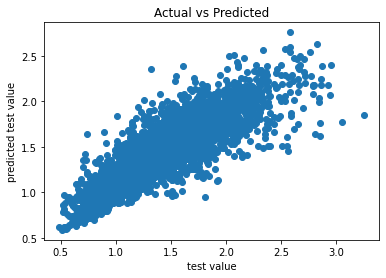

In [158]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('test value')
plt.ylabel('predicted test value')
plt.title("Actual vs Predicted")
plt.show()

# Model Evaluation

Testing Errors

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [160]:
mean_absolute_error(y_test, y_pred_test)

0.13472657534246577

In [161]:
mean_squared_error(y_test, y_pred_test)

0.03693230729578894

In [162]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

0.19217780125651593

Training Errors

In [163]:
mean_absolute_error(y_train, y_pred_train)

4.900790731254972e-16

In [164]:
mean_squared_error(y_train, y_pred_train)

3.7834732434092813e-31

In [165]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

6.150994426439746e-16

# Regularization

In [166]:
from sklearn.linear_model import Lasso, LassoCV

In [167]:
lasscv = LassoCV(alphas=None, max_iter=99999, normalize=True)
a = lasscv.fit(x_train, y_train)
a

LassoCV(max_iter=99999, normalize=True)

In [168]:
alpha = a.alpha_
alpha

2.202898210766389e-06

In [169]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=2.202898210766389e-06)

In [170]:
lasso_reg.score(x_test, y_test)

0.3946618766983513

As we can see there is no need of regularization because Random Forest is giving good score and data is not overfitted, We will save random forest model

# Saving the Model

In [171]:
import pickle

In [172]:
pickle.dump('Rf', open('Randomforest_model', 'wb'))